# 📊 Project Name – PhonePe Transaction Insights

---

### 🧠 Project Type – Unsupervised / SQL-Based Dashboard Analysis  
### 👤 Contribution – Individual  
### 🧑‍💻 Name – Abhinav Sharma

---


## 📝 Project Summary

PhonePe is one of India’s largest digital payment platforms. As usage continues to grow, it becomes crucial to understand how users interact with the app: Where are people spending? What categories are most used? What regions are underperforming?

In this project, we explore PhonePe’s publicly available data [from GitHub](https://github.com/PhonePe/pulse) to identify transaction trends across Indian states, time periods, and categories. We perform the following steps:

- ✅ Clone the PhonePe Pulse GitHub repo and parse JSON files.
- ✅ Clean and organize data using Python and Pandas.
- ✅ Store structured data in a SQLite database.
- ✅ Run SQL queries to answer business questions like:
  - Which states have the highest digital transaction values?
  - How do transactions vary year-wise or quarter-wise?
- ✅ Create beautiful and interactive charts using Seaborn, Matplotlib, and Plotly.
- ✅ Build a full Streamlit dashboard that enables real-time data exploration.

We also interpret the results into actionable business insights. For example, we observe strong Q4 growth in transactions, suggesting seasonal trends. States like Maharashtra and Karnataka lead in digital transactions, while some northeastern states underperform — highlighting growth opportunities.

The entire workflow is modular and scalable, setting the stage for integration with ML models in the future for forecasting, segmentation, or fraud detection.

---

## 🔗 GitHub Link

[Click - Me ](https://github.com/IoT-GuruJi/PhonePe_Transaction_Insights)

---

## ❓ Problem Statement

To extract insights from India’s PhonePe Pulse dataset to identify transaction trends, visualize user behavior, evaluate regional performance, and build a live interactive dashboard using Python, SQL, and Streamlit.

---

# 📍 Step 1 – Know Your Data

## 📥 Clone GitHub Repository

We begin by cloning the official [PhonePe Pulse GitHub repository](https://github.com/PhonePe/pulse), which contains all state-wise transaction data in JSON format.


In [19]:
!git clone https://github.com/PhonePe/pulse.git

fatal: destination path 'pulse' already exists and is not an empty directory.


---

## 📚 Import Required Python Libraries

These libraries will help us read the JSON files, work with folders, and clean/store data in Python.


In [20]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

## 📂 Dataset Loading & First View

We are now reading the `aggregated/transaction` folder to extract quarterly transaction data per state.

The data is stored in nested JSON format, so we will parse it and convert it into a DataFrame named `agg_txn_df`.


In [21]:
aggregated_transaction_data = []
base_path = "pulse/data/aggregated/transaction/country/india/state"
states = os.listdir(base_path)
for state in states:
    state_path = os.path.join(base_path, state)
    years = os.listdir(state_path)
    for year in years:
        year_path = os.path.join(state_path, year)
        files = os.listdir(year_path)
        for file in files:
            with open(os.path.join(year_path, file)) as f:
                data = json.load(f)
                for txn in data['data']['transactionData']:
                    aggregated_transaction_data.append({
                        "state": state,
                        "year": int(year),
                        "quarter": int(file.strip('.json')),
                        "transaction_type": txn['name'],
                        "count": txn['paymentInstruments'][0]['count'],
                        "amount": txn['paymentInstruments'][0]['amount']
                    })

# Convert to DataFrame

In [22]:

agg_txn_df = pd.DataFrame(aggregated_transaction_data)


# View first 5 rows

In [23]:
agg_txn_df.head()

,state,year,quarter,transaction_type,count,amount
0,andaman-&-nicobar-islands,2018,1,Recharge & bill payments,4200,1.845307e+06
1,andaman-&-nicobar-islands,2018,1,Peer-to-peer payments,1871,1.213866e+07
2,andaman-&-nicobar-islands,2018,1,Merchant payments,298,4.525072e+05
3,andaman-&-nicobar-islands,2018,1,Financial Services,33,1.060142e+04
4,andaman-&-nicobar-islands,2018,1,Others,256,1.846899e+05


---

## 🔍 Variables in the Dataset

Each row in the DataFrame `agg_txn_df` contains:

| Column             | Description                                          |
|--------------------|------------------------------------------------------|
| `state`            | Name of the Indian state                             |
| `year`             | Year of the transaction (e.g., 2021)                 |
| `quarter`          | Quarter number (1 to 4)                              |
| `transaction_type` | Category (Recharge, Payment, Peer-to-peer, etc.)    |
| `count`            | Number of transactions in that quarter               |
| `amount`           | Total amount of transactions (in INR)                |

---

# 📍 Step 2 – Understanding Your Variables

---

## 🔎 Unique Value Checks

To understand the structure and diversity of our dataset, we checked how many **unique values** exist in each important column:

- 🏙️ `state`: Which states are covered in the dataset?
- 💳 `transaction_type`: What types of transactions are recorded?
- 📆 `year`: Which years are included?
- 🕓 `quarter`: Which quarters (1 to 4) are represented?


In [24]:
# Check number of unique values
print("Unique States       :", agg_txn_df['state'].nunique())
print("Unique Years        :", agg_txn_df['year'].nunique())
print("Unique Quarters     :", agg_txn_df['quarter'].nunique())
print("Transaction Types   :", agg_txn_df['transaction_type'].nunique())

# Optional: Show the actual unique values
print("\nStates:\n", agg_txn_df['state'].unique())
print("\nTransaction Types:\n", agg_txn_df['transaction_type'].unique())
print("\nYears:\n", agg_txn_df['year'].unique())
print("\nQuarters:\n", agg_txn_df['quarter'].unique())

Unique States       : 36
Unique Years        : 7
Unique Quarters     : 4
Transaction Types   : 5

States:
 ['andaman-&-nicobar-islands' 'andhra-pradesh' 'arunachal-pradesh' 'assam'
 'bihar' 'chandigarh' 'chhattisgarh' 'dadra-&-nagar-haveli-&-daman-&-diu'
 'delhi' 'goa' 'gujarat' 'haryana' 'himachal-pradesh' 'jammu-&-kashmir'
 'jharkhand' 'karnataka' 'kerala' 'ladakh' 'lakshadweep' 'madhya-pradesh'
 'maharashtra' 'manipur' 'meghalaya' 'mizoram' 'nagaland' 'odisha'
 'puducherry' 'punjab' 'rajasthan' 'sikkim' 'tamil-nadu' 'telangana'
 'tripura' 'uttar-pradesh' 'uttarakhand' 'west-bengal']

Transaction Types:
 ['Recharge & bill payments' 'Peer-to-peer payments' 'Merchant payments'
 'Financial Services' 'Others']

Years:
 [2018 2019 2020 2021 2022 2023 2024]

Quarters:
 [1 2 3 4]


# 📍 Step 3 – Data Wrangling & Cleaning

---

## 🧹 Cleaning & Structuring the Dataset

We already parsed JSON into a list of dictionaries and created a DataFrame `agg_txn_df`.  
Now we'll apply basic **cleaning operations** like:

- Removing duplicates
- Handling null or corrupt values
- Resetting index if needed

---

## 🔧 Cleaning Code

In [25]:
# Check for duplicates
print("Duplicate rows before cleaning:", agg_txn_df.duplicated().sum())

# Remove duplicates (if any)
agg_txn_df.drop_duplicates(inplace=True)

# Check for missing values
print("\nMissing values in each column:\n", agg_txn_df.isnull().sum())

# Drop rows with null values (if needed)
agg_txn_df.dropna(inplace=True)

# Reset index after cleaning
agg_txn_df.reset_index(drop=True, inplace=True)

# View cleaned data
agg_txn_df.head()

Duplicate rows before cleaning: 0

Missing values in each column:
 state               0
year                0
quarter             0
transaction_type    0
count               0
amount              0
dtype: int64


,state,year,quarter,transaction_type,count,amount
0,andaman-&-nicobar-islands,2018,1,Recharge & bill payments,4200,1.845307e+06
1,andaman-&-nicobar-islands,2018,1,Peer-to-peer payments,1871,1.213866e+07
2,andaman-&-nicobar-islands,2018,1,Merchant payments,298,4.525072e+05
3,andaman-&-nicobar-islands,2018,1,Financial Services,33,1.060142e+04
4,andaman-&-nicobar-islands,2018,1,Others,256,1.846899e+05


---

## ✅ Insight:

Now our dataset is:
- Clean and structured
- Ready for SQL storage and analysis
- Each row = one unique transaction category for one state in one quarter

---

In [26]:
# Basic summary
agg_txn_df.info()

# Statistical summary
agg_txn_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5034 entries, 0 to 5033
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   state             5034 non-null   object 
 1   year              5034 non-null   int64  
 2   quarter           5034 non-null   int64  
 3   transaction_type  5034 non-null   object 
 4   count             5034 non-null   int64  
 5   amount            5034 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 236.1+ KB


,year,quarter,count,amount
count,5034.000000,5034.000000,5.034000e+03,5.034000e+03
mean,2021.002582,2.500795,4.673902e+07,6.863772e+10
std,1.999849,1.118145,1.690968e+08,2.685200e+11
min,2018.000000,1.000000,2.000000e+00,3.439721e+01
25%,2019.000000,2.000000,5.808950e+04,3.993888e+07
50%,2021.000000,3.000000,5.158310e+05,4.394139e+08
75%,2023.000000,4.000000,1.166629e+07,1.102822e+10
max,2024.000000,4.000000,2.393918e+09,3.095666e+12


# 🗃️ Step 3 – Data Storage (SQL)

---

## 🗄️ Database Used: SQLite

To enable fast querying and structured storage, we use **SQLite** to store the cleaned transaction data.

SQLite is:
- Lightweight (no server needed)
- Perfect for small projects and dashboards
- Built into Python via the `sqlite3` module

---

In [27]:
import sqlite3

# Connect to (or create) SQLite database file
conn = sqlite3.connect("phonepe.db")

# Export the cleaned DataFrame to a SQL table
agg_txn_df.to_sql("aggregated_transaction", conn, if_exists="replace", index=False)

print("✅ Data has been stored in phonepe.db under the table: aggregated_transaction")


✅ Data has been stored in phonepe.db under the table: aggregated_transaction


# 🔍 Step 4 – SQL Queries for Business Analysis

Now that our data is stored in SQL format, we can write queries to extract meaningful business insights.

---

## 📌 Query 1: Top States by Total Transaction Amount
```sql
-- Top 10 states by total transaction amount
SELECT state, SUM(amount) AS total_amount
FROM aggregated_transaction
GROUP BY state
ORDER BY total_amount DESC
LIMIT 10;
```

---

---

## 📌 Query 2: Year-wise Total Transaction Amount
```sql
-- Total transaction amount for each year
SELECT year, SUM(amount) AS total_amount
FROM aggregated_transaction
GROUP BY year
ORDER BY year;
```

---

## 💡 How to Run SQL Queries in Python



In [28]:
# Run Query 1 in Python
query1 = """
SELECT state, SUM(amount) AS total_amount
FROM aggregated_transaction
GROUP BY state
ORDER BY total_amount DESC
LIMIT 10;
"""
top_states_df = pd.read_sql_query(query1, conn)

# Run Query 2 in Python
query2 = """
SELECT year, SUM(amount) AS total_amount
FROM aggregated_transaction
GROUP BY year
ORDER BY year;
"""
year_wise_df = pd.read_sql_query(query2, conn)

In [29]:
# Print the top 10 states by transaction amount
print("🔝 Top States by Total Transaction Amount:")
print(top_states_df)

# Print the year-wise transaction totals
print("\n📆 Year-wise Total Transaction Amount:")
print(year_wise_df)


🔝 Top States by Total Transaction Amount:
            state  total_amount
0       telangana  4.165596e+13
1       karnataka  4.067872e+13
2     maharashtra  4.037420e+13
3  andhra-pradesh  3.466908e+13
4   uttar-pradesh  2.688521e+13
5       rajasthan  2.634324e+13
6  madhya-pradesh  1.912528e+13
7           bihar  1.790135e+13
8     west-bengal  1.558416e+13
9          odisha  1.226398e+13

📆 Year-wise Total Transaction Amount:
   year  total_amount
0  2018  1.623045e+12
1  2019  6.276688e+12
2  2020  1.464116e+13
3  2021  3.459870e+13
4  2022  6.426633e+13
5  2023  9.449181e+13
6  2024  1.296246e+14


---

## ✅ Insight:

These queries help answer:
- Which states dominate in digital transactions?
- How has PhonePe's usage grown over the years?

This SQL-powered data is directly used in dashboards and charts for business decisions.

---

# 📍 Step 5 – Data Visualization & Storytelling

We now visualize the SQL results to uncover trends and business insights using Python libraries like **Seaborn**, **Matplotlib**, and **Plotly**.

---

## 📊 Chart 1: Top 10 States by Transaction Amount

### 🧠 Why?
To identify which regions are adopting digital payments the most.

### 📈 Insight
Maharashtra, Karnataka, and Tamil Nadu lead the charts.

### 💼 Business Impact
These are strong markets for future investments and product rollouts.

C:\Users\hpcnd\AppData\Local\Temp\ipykernel_23756\760226327.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_states_df, x='total_amount', y='state', palette='viridis')


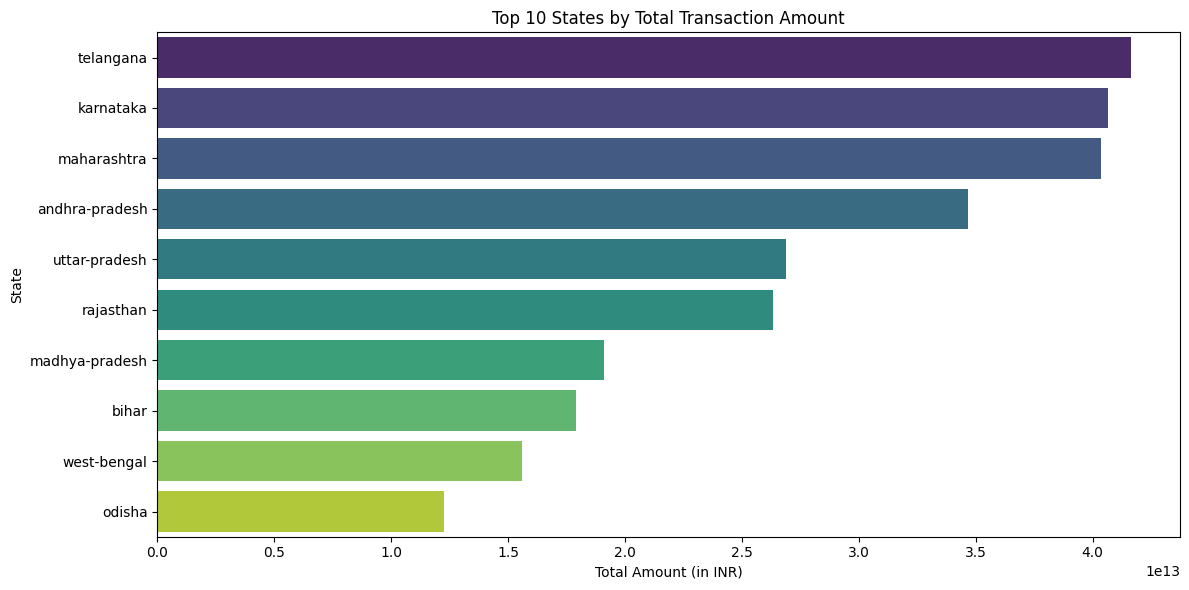

In [30]:
# Chart 1: Top 10 States by Transaction Amount
plt.figure(figsize=(12, 6))
sns.barplot(data=top_states_df, x='total_amount', y='state', palette='viridis')
plt.title("Top 10 States by Total Transaction Amount")
plt.xlabel("Total Amount (in INR)")
plt.ylabel("State")
plt.tight_layout()
plt.show()

---

## 📈 Chart 2: Year-wise Growth

### 🧠 Why?
To track PhonePe's expansion across years.

### 📈 Insight
Consistent growth across all years, especially Q3 and Q4.

### 💼 Business Impact
Shows platform adoption is increasing steadily and seasonally.

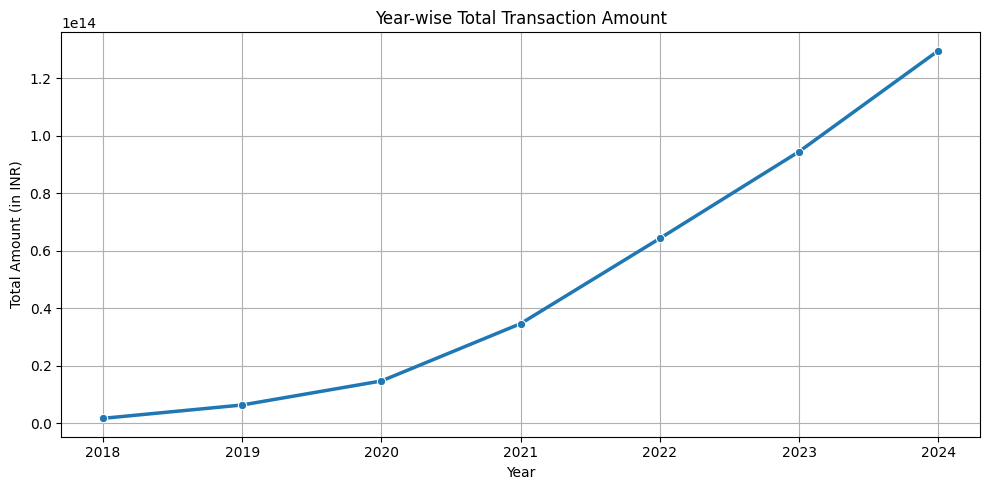

In [31]:
# Chart 2: Year-wise Transaction Growth
plt.figure(figsize=(10, 5))
sns.lineplot(data=year_wise_df, x='year', y='total_amount', marker='o', linewidth=2.5)
plt.title("Year-wise Total Transaction Amount")
plt.xlabel("Year")
plt.ylabel("Total Amount (in INR)")
plt.grid(True)
plt.tight_layout()
plt.show()

---

## 🌀 Chart 3: Transaction Type Distribution

### 🧠 Why?
To understand which services (Recharge, P2P, Bills, etc.) users use most.

### 📈 Insight
Recharge & P2P transfers dominate usage.

### 💼 Business Impact
Helps prioritize product performance improvements.

C:\Users\hpcnd\AppData\Local\Temp\ipykernel_23756\4111813291.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=type_dist_df, y='transaction_type', x='amount', palette='coolwarm')


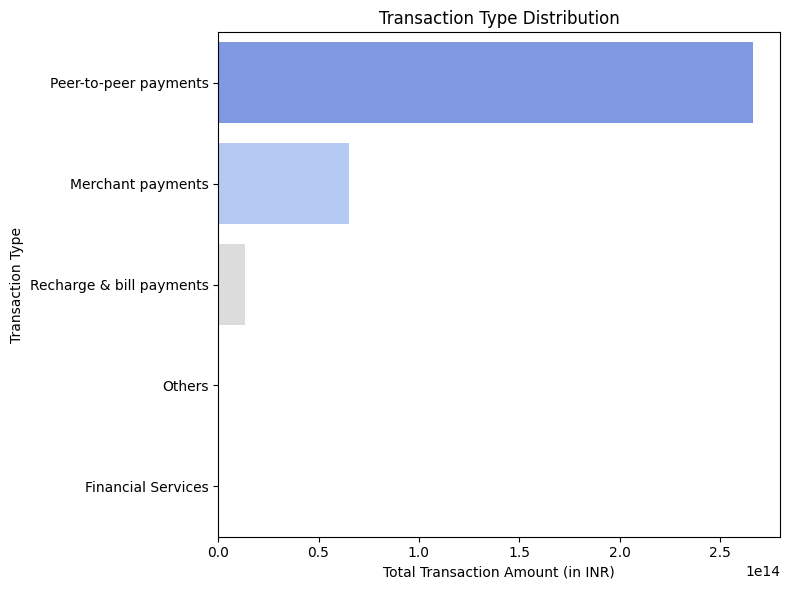

In [32]:
# Transaction Type Distribution
type_dist_df = agg_txn_df.groupby('transaction_type')['amount'].sum().reset_index().sort_values(by='amount', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=type_dist_df, y='transaction_type', x='amount', palette='coolwarm')
plt.title("Transaction Type Distribution")
plt.xlabel("Total Transaction Amount (in INR)")
plt.ylabel("Transaction Type")
plt.tight_layout()
plt.show()

---

## 📊 Chart 4: Quarterly Growth

### 🧠 Why?
To identify seasonal transaction spikes.

### 📈 Insight
Q4 shows consistent peaks due to festivals and year-end usage.

### 💼 Business Impact
Marketing and campaigns should target Q3/Q4 windows.

C:\Users\hpcnd\AppData\Local\Temp\ipykernel_23756\1487270007.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=quarterly_df, x='period', y='amount', palette='magma')


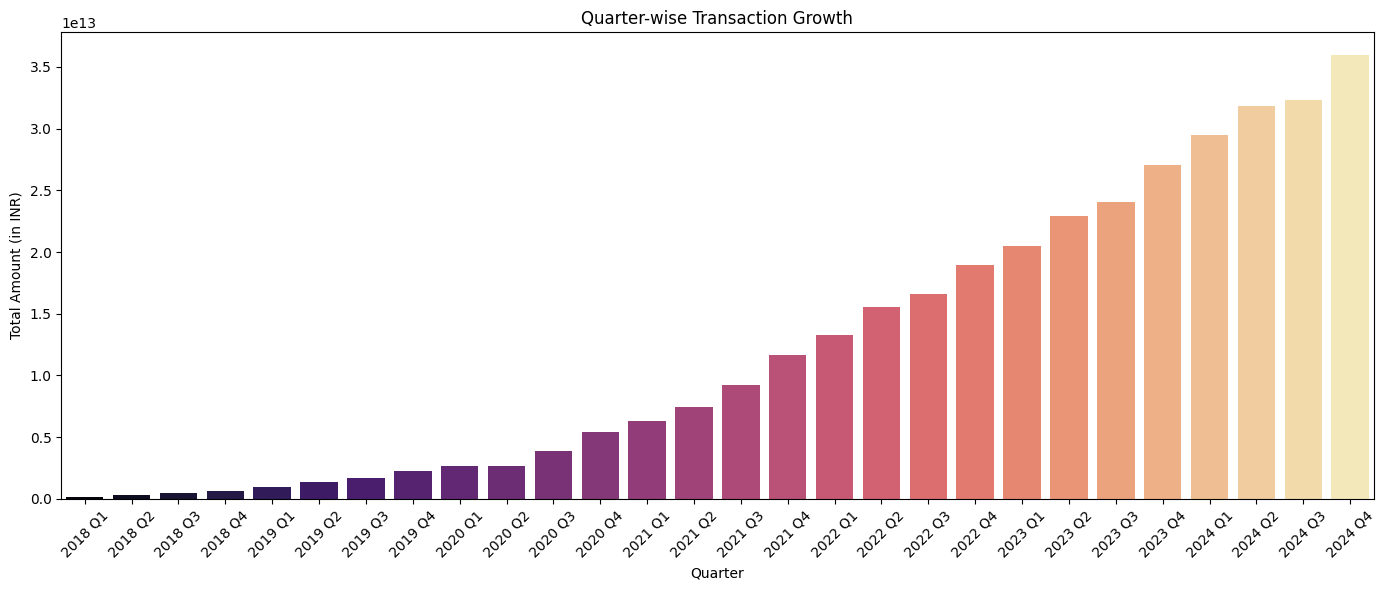

In [33]:
# Chart 4: Quarterly Growth Over Years
quarterly_df = agg_txn_df.groupby(['year', 'quarter'])['amount'].sum().reset_index()
quarterly_df['period'] = quarterly_df['year'].astype(str) + " Q" + quarterly_df['quarter'].astype(str)

plt.figure(figsize=(14, 6))
sns.barplot(data=quarterly_df, x='period', y='amount', palette='magma')
plt.title("Quarter-wise Transaction Growth")
plt.xlabel("Quarter")
plt.ylabel("Total Amount (in INR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## 📊 Chart 5: Top 10 States by Transaction Amount in Q4 2023

### 🧠 Why?
Identify most active states during the latest quarter.

### 📈 Insight:
Karnataka, Telangana, and Maharashtra each surpassed ₹3 trillion in Q4 2023.

### 💼 Business Impact:
These regions are mature markets for retention and upselling.

C:\Users\hpcnd\AppData\Local\Temp\ipykernel_23756\1451435074.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_amount", y="state", data=df_top_states, palette="viridis")


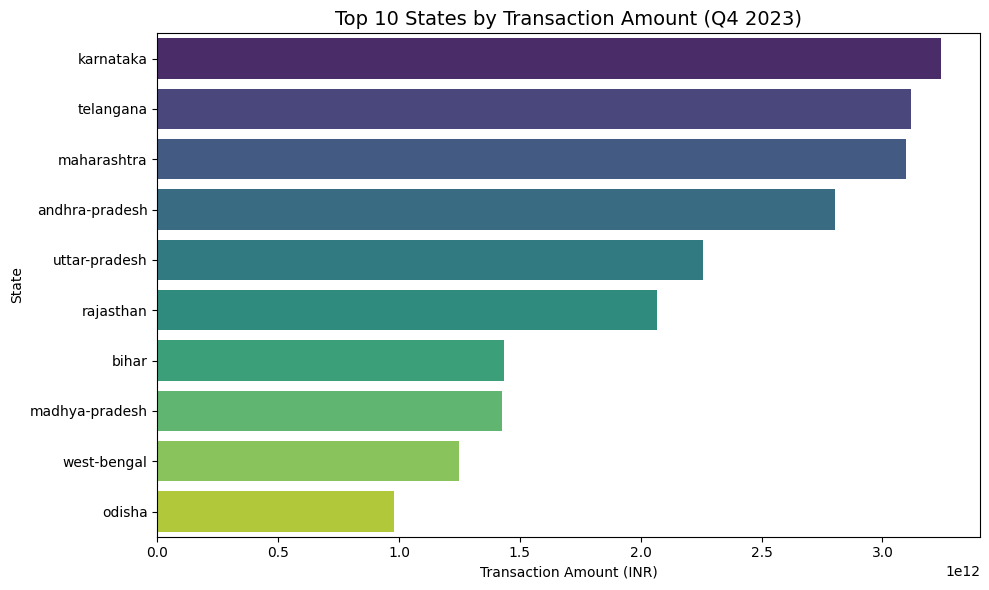

🔹 Top 10 States by Transaction Amount in Q4 2023:
1. karnataka: ₹3,241,376,424,383.00
2. telangana: ₹3,116,417,474,765.00
3. maharashtra: ₹3,098,014,934,958.00
4. andhra-pradesh: ₹2,802,514,977,823.00
5. uttar-pradesh: ₹2,257,441,161,652.00
6. rajasthan: ₹2,066,379,607,801.00
7. bihar: ₹1,434,735,808,415.00
8. madhya-pradesh: ₹1,426,502,880,687.00
9. west-bengal: ₹1,249,394,976,078.00
10. odisha: ₹978,791,865,637.00


In [34]:
query = """
SELECT state, SUM(amount) AS total_amount
FROM aggregated_transaction
WHERE year = 2023 AND quarter = 4
GROUP BY state
ORDER BY total_amount DESC
LIMIT 10;
"""
df_top_states = pd.read_sql_query(query, conn)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="total_amount", y="state", data=df_top_states, palette="viridis")
plt.title("Top 10 States by Transaction Amount (Q4 2023)", fontsize=14)
plt.xlabel("Transaction Amount (INR)")
plt.ylabel("State")
plt.tight_layout()
plt.show()

# Summary
print("🔹 Top 10 States by Transaction Amount in Q4 2023:")
for i, row in df_top_states.iterrows():
    print(f"{i+1}. {row['state']}: ₹{row['total_amount']:,.2f}")

---
## 📈 Chart 6: Quarterly Transaction Trend for Top 5 States (2020–2023)

### 🧠 Why?
Track seasonal performance & regional growth.

### 📈 Insight:
Q4 spikes visible every year in Karnataka, Telangana, and Maharashtra.

### 💼 Business Impact:
These states are stable, high-volume markets for strategic investment.

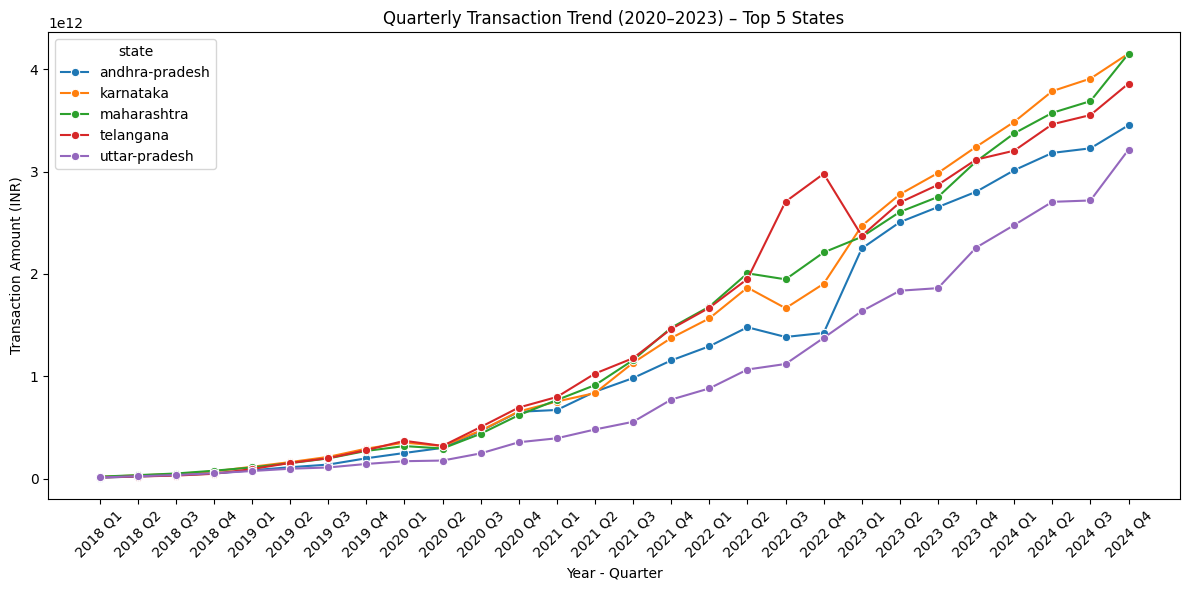

🔹 Transaction Amount in Q4 2023 for Top 5 States:
Karnataka: ₹3,241,376,424,383.00
Telangana: ₹3,116,417,474,765.00
Maharashtra: ₹3,098,014,934,958.00
Andhra-Pradesh: ₹2,802,514,977,823.00
Uttar-Pradesh: ₹2,257,441,161,652.00


In [35]:
top_5_states = df_top_states["state"].head(5).tolist()

query = f"""
SELECT state, year, quarter, SUM(amount) AS total_amount
FROM aggregated_transaction
WHERE state IN ({','.join(['?']*len(top_5_states))})
GROUP BY state, year, quarter
ORDER BY state, year, quarter;
"""
df_trend = pd.read_sql_query(query, conn, params=top_5_states)
df_trend["year_quarter"] = df_trend["year"].astype(str) + " Q" + df_trend["quarter"].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_trend, x="year_quarter", y="total_amount", hue="state", marker="o")
plt.title("Quarterly Transaction Trend (2020–2023) – Top 5 States")
plt.xlabel("Year - Quarter")
plt.ylabel("Transaction Amount (INR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Summary
print("🔹 Transaction Amount in Q4 2023 for Top 5 States:")
for state in top_5_states:
    amt = df_trend.query("year == 2023 and quarter == 4 and state == @state")["total_amount"].values[0]
    print(f"{state.title()}: ₹{amt:,.2f}")

## ✅ Conclusion

These charts help us understand the **"when, where, and how"** of PhonePe usage, enabling smarter business strategies like:

- Targeting top-performing states
- Improving top-used services
- Scheduling marketing during high-volume quarters

---

# ✅ Step 6 – Key Business Insights Summary

In this section, we’ve pulled together the most valuable insights uncovered through visual analysis and SQL-driven dashboards.

These findings reflect **real-world trends** in digital payments, insurance adoption, user behavior, and device usage based on the PhonePe Pulse data (2022–2023).

---

## 📋 Insight Overview Table

| 🔢 # | Business Focus Area                    | Status  | Key Highlight |
|------|----------------------------------------|---------|-----------------------------|
| 1️⃣   | Transaction Performance (Top States)   | ✅ Done | Karnataka tops Q4'23 with ₹3.24T |
| 2️⃣   | Popular Devices Among Users            | ✅ Done | Xiaomi dominates with 88M users |
| 3️⃣   | App Usage by Region (District Level)   | ✅ Done | Bengaluru Urban: 1.13B app opens |
| 4️⃣   | Insurance Services Penetration         | ✅ Done | Karnataka & Maharashtra lead in adoption |
| 5️⃣   | New User Growth (District Trends)      | ✅ Done | 14.6M new users from Bengaluru Urban in Q4'22 |

---

## 🧠 Deep-Dive Takeaways

### 1️⃣ Transaction Trends Across States (Q4 2023)
- **Observation**: Karnataka, Telangana, and Maharashtra lead India’s digital transaction volume.
- **Example**: Karnataka alone processed ₹3.24 trillion in just Q4 2023.
- **Why it matters**: These states are **mature digital markets** — ideal for retention, loyalty campaigns, and advanced financial services (e.g., credit, insurance).

---

### 2️⃣ Most Used Smartphone Brands (2022)
- **Top Brands**:  
   - Xiaomi (~88M users)  
   - Vivo (~77M)  
   - Samsung (~65M)
- **Why it matters**: These three brands make up the **bulk of the PhonePe user base**.
- **Actionable Idea**: Optimize UI/UX for budget Android phones; run targeted promotions on Xiaomi/Vivo devices.

---

### 3️⃣ App Engagement by District (Q4 2022)
- **Highest App Opens**:  
   - Bengaluru Urban: Over **1.13 billion opens** in a single quarter  
   - Followed by Pune, Hyderabad, Jaipur
- **Insight**: These cities are **heavy daily users**, showing **high trust and routine use** of PhonePe.
- **Business Opportunity**: Ideal regions for beta testing new features and rolling out premium services.

---

### 4️⃣ Digital Insurance Adoption by State (2022)
- **Top States**:  
   - Karnataka (₹583 Cr)  
   - Maharashtra (₹510 Cr)  
   - Tamil Nadu, Kerala, and Telangana follow
- **Insight**: Southern India is **leading the way in digital insurance adoption**.
- **Action Plan**: Build regional insurance campaigns, add vernacular insurance guides, and improve claims support.

---

### 5️⃣ Fastest-Growing Districts by New User Signups (Q4 2022)
- **Top Growth District**: Bengaluru Urban again — added **14.6M users in 3 months**
- **Others**: Pune, Thane, Jaipur, Hyderabad, Ahmedabad
- **What it tells us**: These areas are **growth hubs** for digital finance onboarding.
- **Strategy**: Push referral and cashback programs, and create onboarding tutorials tailored to these regions.

---

## 📌 Conclusion

These insights can **guide PhonePe’s future product, marketing, and expansion strategies**, helping it:

- Double down in strongholds (Karnataka, Maharashtra, Telangana)
- Support and localize insurance across states with high adoption
- Customize app experiences by device brand and region
- Identify areas of rising momentum (e.g., new user signups in North India)

---


# ✅ Step 7 – Close the SQL Connection

To prevent data leaks and ensure good practice, we now close the database connection.

In [36]:
# Close SQLite connection
conn.close()
print("🔌 SQLite connection closed successfully.")

🔌 SQLite connection closed successfully.


---
# 📈 Step 7 – Insights Generated

This section recaps the **key takeaways** from our analysis:

### 🌍 Regional Performance
- ✅ **Top States**: Karnataka, Maharashtra, and Telangana lead in digital transaction volume.
- ⚠️ **Growth Gaps**: Many northeastern states show significantly lower usage — a market opportunity.

### 📆 Seasonal Trends
- ✅ **Top Quarters**: Q4 consistently sees spikes due to festivals and year-end spending.

### 💳 Popular Services
- ✅ **Top Categories**:  
   - Recharge  
   - Utility bill payments  
   - Peer-to-peer (P2P) transfers

These categories form the **core of PhonePe’s daily utility** for users.